¡Hola,Sergio!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Sergio! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un cientifico de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-info">
<b>Hola Tonatiuh!</b> <a class="tocSkip"></a>

Gracias por tus comentarios, quisiera confirmar que he encontrado el error que estaba cometiendo al momento de filtrar los dataframes en base al genero y a la plataforma, pues habia escrito mal los nombres de ciertas cosas por eso aparecian vacias o bien, no habian coincidencias con la forma correcta en la que estaban escritas estas palabras en el Dataframe, ya lo he corregido y también he ajustado las conclusiones.

# Desarrollo Paso 1. Descripción de los datos

En primer lugar voy importar las librerías, luego realizaré la lectura del archivo CSV y a haré una visualización previa de los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st

In [2]:
df_games = pd.read_csv('/datasets/games.csv')
df_games.info()
print()
print(df_games.head())
print()
print(df_games.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# Observaciones hasta el momento

Al revisar los datos encuentro que:
1. efctivamente los nombres de las columnas se encuentran en mayusculas como indica el enunciado y para facilitar su manejo más adelante es mejor convertir estos nombres en minúsculas.
2. las columnas "name", "platform" y "genre" también deberían modificarse a minúsculas para evitar problemas de sintaxis al momento de usar sus datos más adelante.
3. la columna year_of_release está catalogada como float64, y dado que necesito los años son números enteros cambiaré el tipo de dato a int64 para que tengan más coherencia.
4. por otro lado tambien es evidente la presencia de valores ausentes en las columnas "Critic_Score", "User_Score", "Rating", tendría que revisarlos para tomar decisiones.

# Desarrollo Paso 2. Preparación de los datos
Realizaré las correcciones mencionadas anteriormente

In [3]:
print(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [4]:
# 1. Modifico los nombres de las columnas a minúsculas
df_games.columns = df_games.columns.str.lower()  
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# 2. Modifico las columnas "name", "platform" y "genre" a minúsculas usando un bucle
# for y la lista de columnas que quiero modificar.

cols =['name', 'platform', 'genre']
for col in cols:
    df_games[col]=df_games[col].str.lower()

print(df_games.head(10))

                        name platform  year_of_release         genre  \
0                 wii sports      wii           2006.0        sports   
1          super mario bros.      nes           1985.0      platform   
2             mario kart wii      wii           2008.0        racing   
3          wii sports resort      wii           2009.0        sports   
4   pokemon red/pokemon blue       gb           1996.0  role-playing   
5                     tetris       gb           1989.0        puzzle   
6      new super mario bros.       ds           2006.0      platform   
7                   wii play      wii           2006.0          misc   
8  new super mario bros. wii      wii           2009.0      platform   
9                  duck hunt      nes           1984.0       shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [6]:
#3. Modifico el tipo de dato de float a integer de la columna year_of_realease

df_games['year_of_release']= df_games['year_of_release'].astype('Int64')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [7]:
#4. Reviso todas las columnas contando la cantidad de valores nulos y de duplicados
#luego elimino lo necesario para completar el pretratamiento de los datos.

print('Número de filas duplicadas:', df_games.duplicated().sum())
print()
print(df_games.isna().sum())


Número de filas duplicadas: 0

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


# ¿CÓMO PROCEDER TENIENDO TANTOS VALORES AUSENTES?
Honestamente, lo que se me ha ocurrido es lo siguiente, las columnas **name** y **genre** que **presentan 2 valores ausentes serán eliminadas** puesto que estas son de las variables más relevantes y no es posible hacer calculos o acomodar estos datos con coherencia entre los demás si no sabemos ni de que juego ni de que genero estamos hablando, por lo tanto se eliminan.

Por otro lado, el **año de lanzamiento** es un dato relevante tambien por lo cual, lo que se me ocurre es **crear un dataframe que agrupe exclusivamente los valores de year_of_release que están vacios, para luego usar función que lea linea por linea este nuevo dataframe que compare con el dataframe completo, de modo que si encuentra coincidencias en el nombre, el genero y plataforma, complete la información del año de lanzamiento de dicho juego.

y por ultimo, las columnas critic_score, user_score, y rating que son las que más datos ausentes poseen, pienso que sería un gran error eliminarlas porque son demasiados datos. si se eliminaran todas las filas de critic_score me quedaria con practicamente la mitad del dataframe y eso sería un gran error para analizar el dataframe completo.
De modo que, en lugar de descartar **las columnas critic_score, user_score y rating**, he optado por completar la mayor cantidad de datos posibles, teniendo en cuenta un método que se vea poco afectado por los valores extremos de la tabla: **para critic_score calcularé la mediana dentro de cada género y rellenaré sus NaN con ese valor**, de esta manera, es posible hacer que cada juego obtenga el “puntaje típico” de su grupo; 

**Para user_score usaré la mediana global y completaré sus valores nulos (NaN/None) con ella**; y en la variable categórica **rating**, ya que no existen filas repetidas que permitan asociar/aproximar una calificación, **modificaré los valores ausentes usando la palabra “Unknown” para cubrir todos los NaN**.


In [8]:
#1 . Elimino valores ausentes en name y genre
df_games=df_games.dropna(subset=['name'])
print(df_games.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [9]:
#2. creo dataframe filtrado que contiene solo los valores ausentes de la columna year_of_release

df_yor = df_games[df_games['year_of_release'].isna()].copy()
print(df_yor)

                                    name platform  year_of_release  \
183                      madden nfl 2004      ps2             <NA>   
377                     fifa soccer 2004      ps2             <NA>   
456           lego batman: the videogame      wii             <NA>   
475           wwe smackdown vs. raw 2006      ps2             <NA>   
609                       space invaders     2600             <NA>   
...                                  ...      ...              ...   
16373  pdc world championship darts 2008      psp             <NA>   
16405                      freaky flyers       gc             <NA>   
16448                          inversion       pc             <NA>   
16458        hakuouki: shinsengumi kitan      ps3             <NA>   
16522                       virtua quest       gc             <NA>   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          sports      4.26      0.26      0.01         0.71          94.0   

# Observaciones Respecto al año de lanzamiento

Acabo de notar algo, que no habia visto antes, al revisar el nuevo dataframe filtrado exclusivamente por los valores ausentes en la columna year_of_release **he notado que algunos nombres en la columna 'name' contienen el año de lanzamiento anotado al final**.

esto me da la oportunidad de separar estos strings, transformar el valor en int y luego reubicarlo en la columna correspondiente que es **year_of_release**

voy a realizar esto mediante una función.

In [10]:
# Defino mi función que recorrerá todas las palabras presentes en cada fila de la columna name, luego, 
# las separara por palabras y tratará de convertir cada sección en int, aquellas que SÍ pueda convertir 
# en int las almacenara en una lista aparte llamada extracted_years y en las que NO, en su lugar las 
# rellenará con un valor nulo NaN

def split_year(name):
    for word in name.split():
        try:
            year=int(word)
            if 1980<= year <=2025:
                return year
        except ValueError:
            continue
    return np.nan

extracted_years = [] #lista que almacenará los años y los valores nulos según corresponda
for name in df_yor['name']: #Aqui recorro cada fila de la columna name
    extracted_years.append(split_year(name)) #agrego los valores a mi lista creada

print('la cantidad de años encontrados en los nombres fue:', pd.Series(extracted_years).notna().sum())
print()

exact_years = pd.Series(extracted_years).dropna().astype(int)
print('Años únicos encontrados en los nombres:')
print(sorted(exact_years.unique()))

la cantidad de años encontrados en los nombres fue: 15

Años únicos encontrados en los nombres:
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2011]


In [11]:
#Reemplazo solo los valores encontrados en year_of_release
df_yor['year_of_release'] = extracted_years #Reemplazo los valores encontrados de los nombres en las columnas correspondientes
df_games.update(df_yor) # actualizo el dataframe df_games con los cambios hechos en df_yor
print(df_games.isna().sum())
print()
df_games.info()

name                  0
platform              0
year_of_release     254
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16459 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64

Ahora sí, efectivamente los datos han cambiado, se han agregado 15 valores a la columna year_of_release, pero siguen siendo 254 valores ausentes de 16.713 datos, es decir que corresponde al 1.52% de los datos, por lo cual si decido continuar descartando estos valores no tendría un impacto significativo a la hora de analizar el conjunto de datos.

In [12]:
df_games=df_games.dropna(subset=['year_of_release'])
print(df_games.isna().sum())
print()
df_games.info()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         6609
rating             6681
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  object 
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       9850 non-null   object 
 10  rating           9778 non-null   object 
dtypes: float64

# Continúo con la ultima parte:



**Completar datos en critic_score**

In [13]:
# Aplico un filtro para conocer el nombre de los juegos a los cuales corresponden los valores ausentes
# de las columnas critic_score, user_score, rating

# df= df_games[['name', 'genre','critic_score', 'user_score', 'rating']]

df_cs= df_games[df_games['critic_score'].isna()] #Filtro solamente los valores ausentes de la columna critic_score
genres_cs = df_cs['genre'].unique() # A partir del filtro anterior, busco los valores unicos presentes en la columna genre
print(genres_cs) # Muestro los generos sobre los cuales debo hallar el valor de a mediana para completar los valores ausentes.

['platform' 'role-playing' 'puzzle' 'shooter' 'simulation' 'action'
 'adventure' 'racing' 'misc' 'sports' 'fighting' 'strategy']


In [14]:
new_cs=[] #creo lista vacia
for g in genres_cs: #creo un bucle for para recorrer todos los generos obtenidos en el paso anterior
    cs_median=df_games[df_games['genre']==g] #filtro el dataframe para que busque los generos a los cuales corresponden los valores ausentes 
    median = cs_median['critic_score'].median() #calculo la mediana de dichos generos especificamente
    new_cs.append(median) #agrego este valor de la mediana a la lista vacia
print(new_cs) #muestro los datos de la mediana calculada para cada genero

[69.5, 74.0, 70.0, 73.0, 70.0, 68.0, 66.0, 69.0, 69.0, 75.0, 72.0, 73.0]


In [15]:
#creo un diccionario para poder usarlo luego como referencia y poder completar los datos nulos
dict_reemplazo = pd.Series(new_cs, index=genres_cs).to_dict()
print(dict_reemplazo)

{'platform': 69.5, 'role-playing': 74.0, 'puzzle': 70.0, 'shooter': 73.0, 'simulation': 70.0, 'action': 68.0, 'adventure': 66.0, 'racing': 69.0, 'misc': 69.0, 'sports': 75.0, 'fighting': 72.0, 'strategy': 73.0}


In [16]:
# reemplazo tal y como corresponde cada mediana en su respectivo lugar según el diccionario obtenido
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['genre'].replace(dict_reemplazo))
print(df_games.isna().sum()) #reviso nuevamente los valores ausentes en todo el dataframe


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6609
rating             6681
dtype: int64


**Completar datos en user_score**

en el primer intento de aplicar el filtro a user_score para obtener la mediana de toda la columna daba error indicando que:

ValueError: could not convert string to float: 'tbd'

por lo cual primero debía convertir ese 'tbd' a NaN y luego sí proceder.

In [17]:
# el valor de esta mediana va a ser global, razón por la cual hay menos pasos que en el anterior proceso.

# 1. Convertir 'tbd' a NaN (y otros textos si existen)
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

# 2. filtro el dataframe para que busque solamente los valores NO NULOS O NO AUSENTES (LOS NÚMEROS) en la columna user_score 
u_s_filter=df_games[df_games['user_score'].notna()] 

# 3. calculo la mediana de la columna user_score con los valores numéricos validos.
us_median = u_s_filter['user_score'].median() 

print('la mediana en la columna user_score tiene un valor de:',us_median)

la mediana en la columna user_score tiene un valor de: 7.5


Muy bien, ahora sí con el valor de la mediana puedo completar los datos en la columna user_score

In [18]:
# Reemplazo los valores NaN de la columna user_score con la mediana (7.5)

df_games['user_score']=df_games['user_score'].fillna(us_median)

print(df_games.isna().sum()) #reviso nuevamente los valores ausentes en todo el dataframe

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6681
dtype: int64


**Completar datos en rating**

Como mencioné anteriormente, en este caso solamente debo reemplazar los valores ausentes NaN por “Unknown”

In [19]:
# Reemplazo los valores NaN de la columna rating con la mediana “Unknown”

df_games['rating']=df_games['rating'].fillna('Unknown')

print(df_games.isna().sum()) #reviso nuevamente los valores ausentes en todo el dataframe

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


**¿Por qué crees que los valores están ausentes?**

Lo más probable es que haya sido un error al momento de tomar los datos, y por otro lado, La clasificación ESRB aplica principalmente a juegos distribuidos o registrados en EE UU.
Los títulos exclusivos de Japón o Europa a veces no aparecen en la base de datos de ESRB, por lo que la columna “rating” queda vacia.

**Calcula las ventas totales**

(la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [20]:
# Calculo de ventas totales
df_games['total_sales']=(
    df_games['na_sales']
    +df_games['eu_sales']
    +df_games['jp_sales']
    +df_games['other_sales']
)
print(df_games['total_sales'])


0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16459, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



# Paso 3. Analiza los datos

1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

2. Observa cómo varían las ventas de una plataforma a otra.
Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

3. Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

4. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

6. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

7. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

8. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

9. Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

# Desarrollo Paso 3

1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?



    year_of_release  total_games_released
0              1980                     9
1              1981                    46
2              1982                    36
3              1983                    17
4              1984                    14
5              1985                    14
6              1986                    21
7              1987                    16
8              1988                    15
9              1989                    17
10             1990                    16
11             1991                    40
12             1992                    41
13             1993                    59
14             1994                   117
15             1995                   215
16             1996                   258
17             1997                   282
18             1998                   364
19             1999                   326
20             2000                   325
21             2001                   428
22             2002             

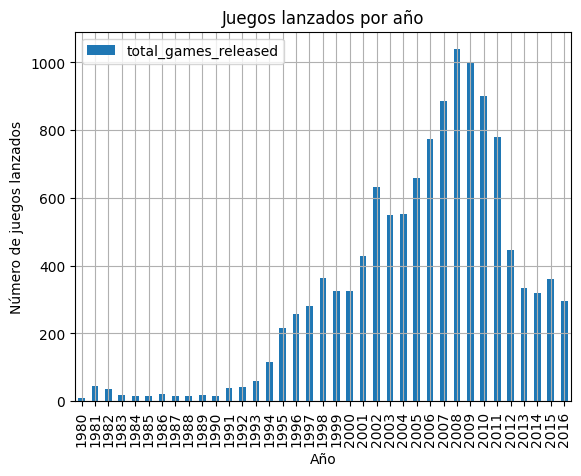

In [21]:
#df_games.info()
#Agrupo el dataframe df_games y enseguida realizo la operación que necesito que es contar los valores unicos de cada nombre de juego por año de lanzamiento
num_games_released_by_year= df_games.groupby(by='year_of_release')['name'].nunique().reset_index().rename(columns={'name': 'total_games_released'})
print()
print()
print(num_games_released_by_year)
# No lo pidieron pero para visualizar mejor los datos aquí muestro la grafica de barras para ver el cambio en el tiempo e la cantidad de juegos lanzados por año.
num_games_released_by_year.plot(x= 'year_of_release',
                                kind= 'bar',
                                title='Juegos lanzados por año',
                                xlabel= 'Año',
                                ylabel='Número de juegos lanzados',
                                grid = True
                               )
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



#  conclusiones hasta el momento:

Después de analizar la gráfica de barras que presenta los juegos lanzados cada año, es evidente que la industria de los videojuegos ha tenido un incremento gigantesco con en el paso del tiempo, pasando desde 9 videojuegos en 1980 hasta 1039 videojuegos lanzados en 2008, que es donde alcanza el valor máximo según los datos del dataframe. Luego, después de este año los números comienzan a disminuir llegando hasta 297 videojuegos lanzados en el año 2016 (que es hasta donde se recogieron los datos de este dataframe).

**2. Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

In [22]:
# 1. Sumo las ventas totales de cada plataforma y renombro la columna resultante como 'sales_by_platform'
sales_by_platform= df_games.groupby(by='platform')['total_sales'].sum().reset_index().rename(columns={'total_sales': 'sales_by_platform'})
print()
#print(sales_by_platform)

# 2. Ordenar de mayor a menor venta y almaceno estos datos en la variable sales_by_platform
sales_by_platform = sales_by_platform.sort_values(by='sales_by_platform', ascending=False)
#print(sales_by_platform)

top_platforms = sales_by_platform.head(10)
print()
print('Las mejores 10 Plataformas son:')
print()
print(top_platforms)



Las mejores 10 Plataformas son:

   platform  sales_by_platform
16      ps2            1247.28
28     x360             961.30
17      ps3             931.34
25      wii             891.18
4        ds             802.79
15       ps             727.58
18      ps4             314.14
6       gba             312.88
19      psp             289.54
2       3ds             257.81


    year_of_release platform  total_sales
0              1985       ds         0.02
1              1994       ps         6.03
2              1995       ps        35.96
3              1996       ps        94.70
4              1997       ps       136.17
..              ...      ...          ...
92             2016      3ds        15.14
93             2016      ps3         3.60
94             2016      ps4        69.25
95             2016      wii         0.18
96             2016     x360         1.52

[97 rows x 3 columns]


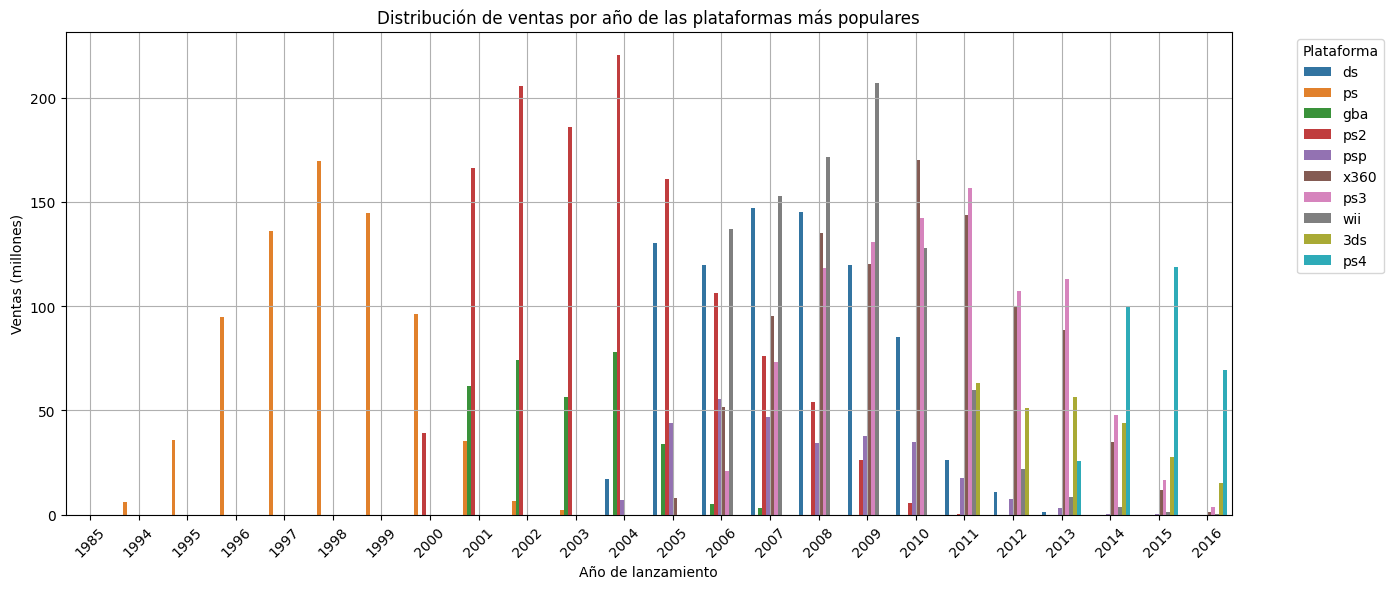

In [23]:
# 3. Convierto las plataformas de top_platforms en una lista
top_platforms_list = top_platforms['platform'].tolist()  

# 4. Filtro directamente el DataFrame original
df_platforms_in_time = df_games[df_games['platform'].isin(top_platforms_list)]

# 5. Agrupo por año y plataforma sumando las ventas.
sales_by_year = df_platforms_in_time.groupby(['year_of_release', 'platform'])['total_sales'].sum()


sales_by_year = sales_by_year.reset_index()
print(sales_by_year)

#6. Visualizar los datos usando un grafico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.barplot(
    data=sales_by_year,
    x='year_of_release',
    y='total_sales',
    hue='platform',
)
plt.title('Distribución de ventas por año de las plataformas más populares')
plt.ylabel('Ventas (millones)')
plt.xlabel('Año de lanzamiento')
plt.xticks(rotation=45)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

In [24]:
# 7. Para saber cunado fueron las ultimas ventas de cada plataforma debo conocer el ultimo año en el cual se registraron ventas 
last_years = sales_by_year.groupby('platform')['year_of_release'].max().reset_index() #agrupo por plataforma y encuentro e valor máximo del año de lanzamiento en el dataframe filtrado.
print('los ultimos años de actividad de cada plataforma fueron:')
print(last_years)

los ultimos años de actividad de cada plataforma fueron:
  platform  year_of_release
0      3ds             2016
1       ds             2013
2      gba             2007
3       ps             2003
4      ps2             2011
5      ps3             2016
6      ps4             2016
7      psp             2015
8      wii             2016
9     x360             2016


In [25]:
# 8. Finalmente, para analizar la duración del ciclo de vida necesito conocer el primer y ultimo año de ventas y calcular la diferencia

time_in_market = sales_by_year.groupby('platform')['year_of_release'].agg(['min', 'max'])
time_in_market['years_in_market'] = time_in_market['max'] - time_in_market['min']
print(time_in_market)

           min   max  years_in_market
platform                             
3ds       2011  2016                5
ds        1985  2013               28
gba       2000  2007                7
ps        1994  2003                9
ps2       2000  2011               11
ps3       2006  2016               10
ps4       2013  2016                3
psp       2004  2015               11
wii       2006  2016               10
x360      2005  2016               11


#  Conclusiones hasta el momento

Este ejercicio consistía en la agrupación, división y reordenamiento de los datos en varios pasos para determinar cuales fueron las plataformas más famosas según sus ventas a lo largo del tiempo, esto produjo como resultado una lista de las cuales yo escogí las 10 mejores plataformas para observar su histórico de ventas en el tiempo, junto con cuanto tiempo tardaban en desaparecer y reaparecer las nuevas plataformas.

El gráfico de barras muestra que el Play Station 2, la Nintendo Wii y el PlayStation 1 fueron las plataformas que mayor cantidad de ventas tuvieron a lo largo del tiempo.
Ademas de mostrar que tanto el PlayStation 2 como La Nintendo Wii llegaron a tener ventas por encima de los 200 millones de dolares y el playStation 1 que quedó en el tercer puesto alcanzó cifras por encima de los 150 millones de dolares.

Por otro lado, he notado algo extraño en los resultados de la tabla final que contiene los años que cada plataforma se ha vendido en el mercado, y es que la plataforma ds muestra que se vendió durante 28 años (desde 1985 hasta 2013) cosa que es bastante extraña ya que la plataforma ds o bien, Nintendo DS oficialmente salió a mercado en el año 2004, pero al buscar un poco en la Web he encontrado que en el año 1985 la plataforma que salió fue la NES, es decir Nintendo Entertainment System, pero no hubo ninguna plataforma de videojuegos que saliera en 1985 con las siglas "DS". Adicionalmente, la NES, estuvo en venta en el mercado pero hasta el año 2003 en Japón (NO 2013 como indica el dataframe). 

Este error podría deberse a que se han rellenado datos equivocadamente y quiza el valor real no son 28 años en el mercado si no 18.

Y revisando los otros datos vemos que en promedio, la gran mayoría de las top 10 plataformas se mantienen en el mercado durante 9 a 11 años como es el caso de:

- Play Station 1
- Play Station 2
- Play Station 3
- Play Station Portable (PSP)
- Nintendo Wii
- Xbox360

Mientras que entre las 10 mejores plataformas la Play Station 4 fue la que menos años estuvo en circulación empezando 2013 a 2016

---

**3.
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.**

Luego de revisar los datos y los gráficos obtenidos considero que el mejor periodo para tomar los datos es desde el año 2012 en adelante, es decir, del 2012 hasta el 2016 ya que es a partir de este momento que los datos comienzan a estabilizarse en terminos de cantidad de ventas al año.

Tomar valores antes de esto puede llegar a ser contraproducente y generar sesgos al momento de tomar decisiones a futuro, pues la industria de los videojuegos ha avanzado bastante y los datos anteriores muestran mayor cantidad de ventas debido también al auge que tuvieron en su momento las primeras plataformas que estuvieron disponibles y el hecho de que el mercado estaba practicamente monopolizado pues habian muy pocas opciones disponibles para el mundo en general. 

Este periodo de tiempo (2012-2016) garantiza que las variables del análisis sean coherentes con las condiciones del mercado al cierre de 2016, lo que las hace más útiles para pronosticar tendencias o tomar decisiones en el año 2017.

**4. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.**

In [26]:
# Aplico filtro al dataframe principal
new_df= df_games[df_games['year_of_release']>=2012].reset_index(drop=True)
print(new_df)

                               name platform year_of_release         genre  \
0                grand theft auto v      ps3            2013        action   
1                grand theft auto v     x360            2013        action   
2         call of duty: black ops 3      ps4            2015       shooter   
3               pokemon x/pokemon y      3ds            2013  role-playing   
4        call of duty: black ops ii      ps3            2012       shooter   
...                             ...      ...             ...           ...   
2881               strawberry nauts      psv            2016     adventure   
2882               aiyoku no eustia      psv            2014          misc   
2883  samurai warriors: sanada maru      ps3            2016        action   
2884        haitaka no psychedelica      psv            2016     adventure   
2885            winning post 8 2016      psv            2016    simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score u

**5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

In [27]:
# 1. Sumo las ventas totales de cada plataforma y renombro la columna resultante como 'sales_by_platform'
new_s_by_platform= new_df.groupby(by='platform')['total_sales'].sum().reset_index().rename(columns={'total_sales': 'sales_by_platform'})
#print(new_s_by_platform)
#print()
# 2. Ordenar de mayor a menor venta y almaceno estos datos en la variable sales_by_platform
new_s_by_platform = new_s_by_platform.sort_values(by='sales_by_platform', ascending=False)
print(new_s_by_platform)

new_top_platforms = new_s_by_platform.head(5)
print()
print('Las mejores 5 Plataformas son:')
print()
print(new_top_platforms)

   platform  sales_by_platform
4       ps4             314.14
3       ps3             288.79
9      x360             236.54
0       3ds             194.61
10     xone             159.32
8      wiiu              82.19
2        pc              62.65
6       psv              49.18
7       wii              35.37
1        ds              12.55
5       psp              11.19

Las mejores 5 Plataformas son:

   platform  sales_by_platform
4       ps4             314.14
3       ps3             288.79
9      x360             236.54
0       3ds             194.61
10     xone             159.32


    year_of_release platform  total_sales
0              2012      3ds        51.36
1              2012       ds        11.01
2              2012      ps3       107.36
3              2012      psp         7.69
4              2012      wii        21.71
5              2012     x360        99.74
6              2013      3ds        56.57
7              2013       ds         1.54
8              2013      ps3       113.25
9              2013      ps4        25.99
10             2013      psp         3.14
11             2013      wii         8.59
12             2013     x360        88.58
13             2014      3ds        43.76
14             2014      ps3        47.76
15             2014      ps4       100.00
16             2014      psp         0.24
17             2014      wii         3.75
18             2014     x360        34.74
19             2015      3ds        27.78
20             2015      ps3        16.82
21             2015      ps4       118.90
22             2015      psp      

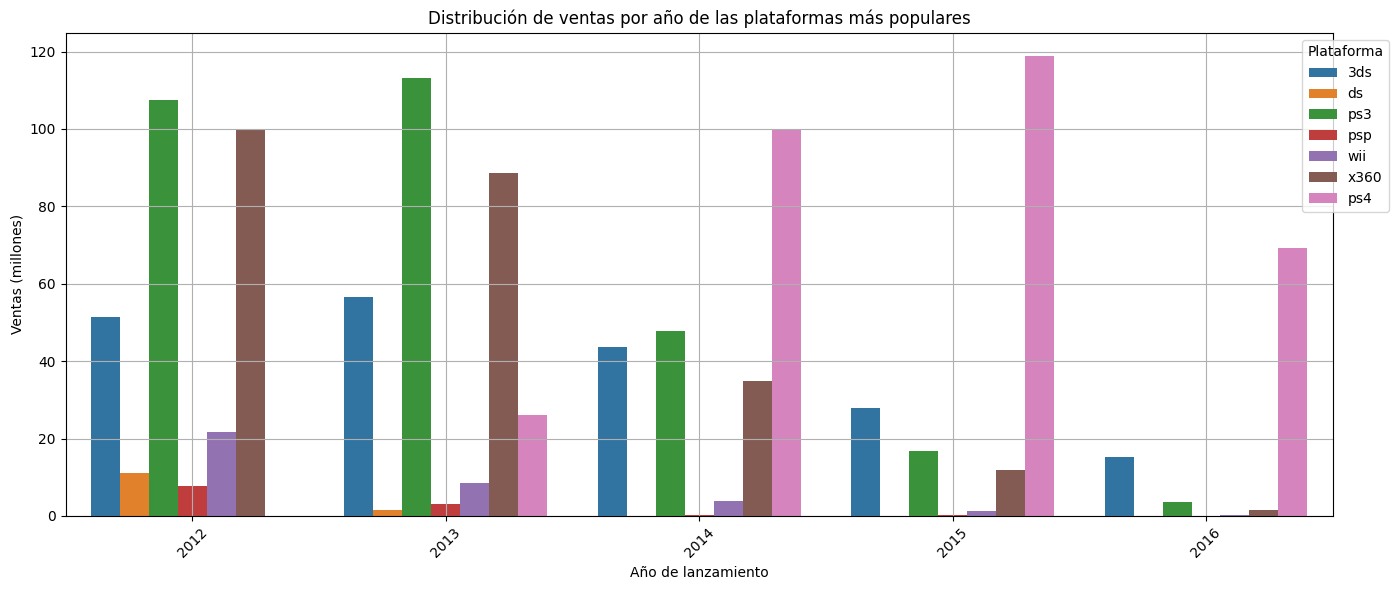

In [28]:
# 3. Convierto las plataformas de new_top_platforms en una lista
new_top_platforms_list = top_platforms['platform'].tolist()  

# 4. Filtro directamente el DataFrame original (new_df)
new_df_plat_in_time = new_df[new_df['platform'].isin(new_top_platforms_list)]

# 5. Agrupo por año y plataforma sumando las ventas.
new_sales_by_year = new_df_plat_in_time.groupby(['year_of_release', 'platform'])['total_sales'].sum()
new_sales_by_year = new_sales_by_year.reset_index()

#sales_by_year = sales_by_year.reset_index()
print(new_sales_by_year)
print()
#6. Visualizar los datos usando un grafico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.barplot(
    data=new_sales_by_year,
    x='year_of_release',
    y='total_sales',
    hue='platform',
)
plt.title('Distribución de ventas por año de las plataformas más populares')
plt.ylabel('Ventas (millones)')
plt.xlabel('Año de lanzamiento')
plt.xticks(rotation=45)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

Las plataformas que son líderes en ventas son PlayStation 4, PlayStation 3, Xbox360, Nintendo 3Ds y Xbox One.

por otro lado, al revisar detenidamente las barras, es valido afirmar que las plataformas que inicialmente muestran un incremento en las ventas entre el año 2012 y 2013 son el PlayStation 3 y el Nintendo 3Ds, pero luego del año 2013 ventas comienzan a disminuir progresivamente hasta el año 2016.

Otra de las plataformas que muestra un comportamiento similar pero entre el año 2013 y 2015 es el PlayStation 4 que consigue un valor muy cercano a las 120 millones de ventas en el 2015 y luego para el 2016 baja casi a la mitad, en general, todas las plataformas van mostrando la disminución progresiva de las ventas para el 2016. 

y finalmente, según los datos, podría decir que las plataformas que son más potencialmente rentables son el PlayStation 4, junto con el Xbox One y el nintendo Wii pero estos dos últimos en menor medida

**6. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**


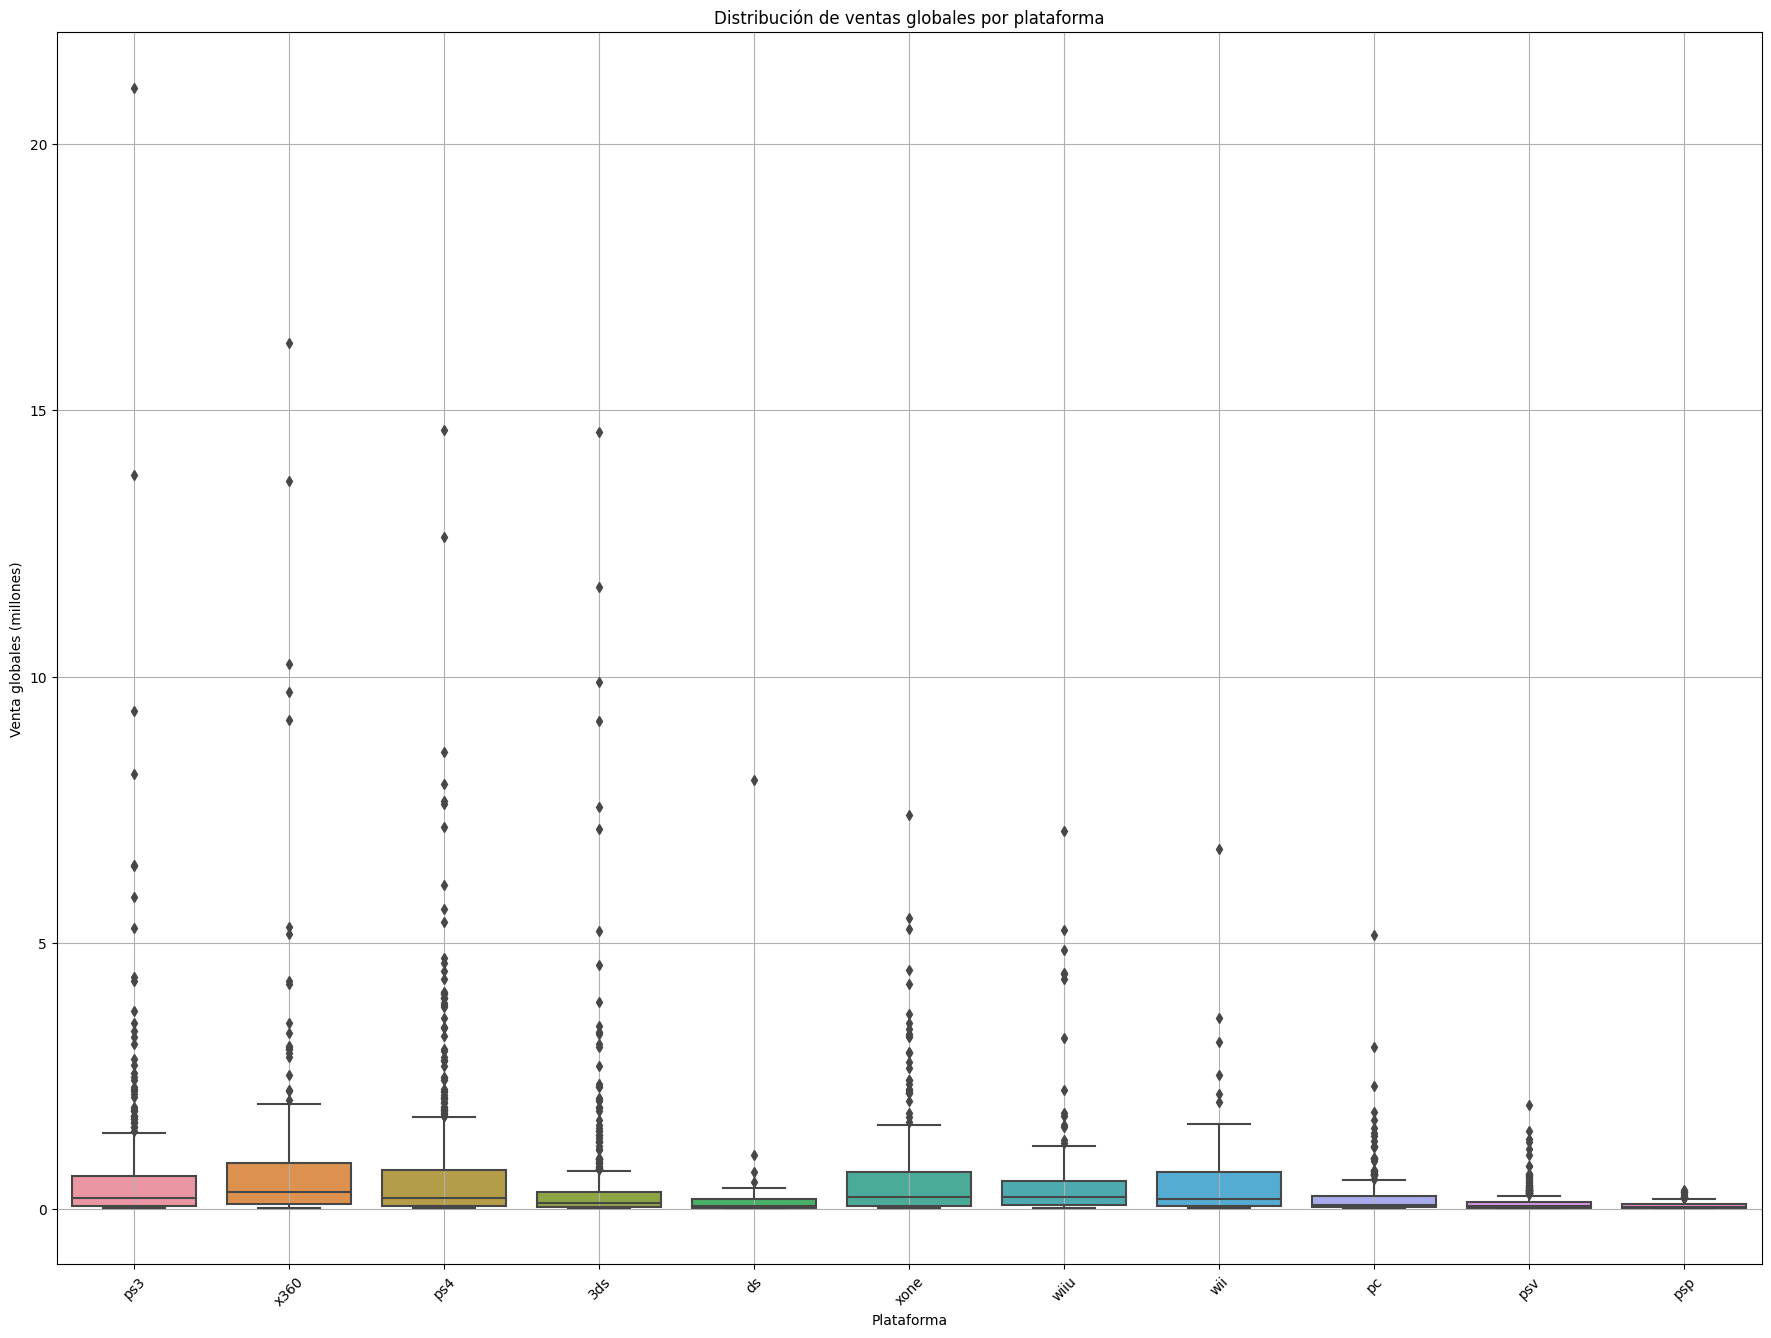

In [29]:
plt.figure(figsize=(22, 16))
sns.boxplot(
    data = new_df,
    x = 'platform',
    y = 'total_sales'
)

plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Venta globales (millones)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>


   platform  mean_sales_by_platform
9      x360                0.810068
4       ps4                0.801378
7       wii                0.655000
10     xone                0.645020
3       ps3                0.585781
8      wiiu                0.559116
0       3ds                0.491439
1        ds                0.404839
2        pc                0.250600
6       psv                0.119659
5       psp                0.064682



Text(0, 0.5, 'Millones de Ventas (promedio)')

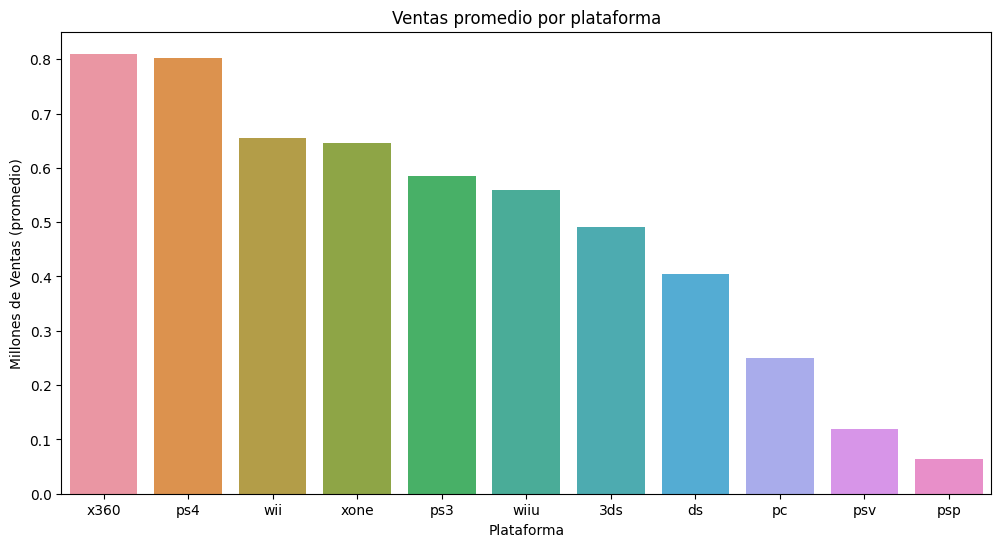

In [30]:
# Ventas promedio en cada plataforma
#new_df.info()

new_df_mean_sales= new_df.groupby('platform')['total_sales'].mean().reset_index().rename(columns={'total_sales': 'mean_sales_by_platform'})
#print(new_df_mean_sales)
print()
#Organizo de Mayor a menor
new_df_mean_sales= new_df_mean_sales.sort_values(by='mean_sales_by_platform', ascending= False)
print(new_df_mean_sales)
print()

plt.figure(figsize=(12,6))
sns.barplot(
    data=new_df_mean_sales,
    x= 'platform',
    y= 'mean_sales_by_platform',
)
plt.title('Ventas promedio por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Millones de Ventas (promedio)')

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. **¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**

El gráfico que contiene los diagramas de caja y bigotes de todas las plataformas, nos muestra que practicamente en todos los casos seaborn ha ajustado sus valores mínimo y máximo muy acotados, ya que los diagramas de caja y bigotes son muy pequeños para todas las plataformas y los valores de la media estan muy cercanos entre plataformas, además de que varios de estos están muy cercanos a cero también. adicionalmente, lo que si muestra es que reconoce como datos atípicos los valores máximos de todas las plataformas. es decir, en todos los casos hay valores máximos que son expuestos como valores atípicos en la cantidad de ventas de las plataformas, este tipo de gráfico no me parece que muestre correctamente el comportamiento real de las ventas durante este periodo de 2012 a 2016.

por otro lado, el gráfico de millones de ventas promedio por plataforma, nos muestra que las plataformas que en promedio tuvieron la mayor cantidad de ventas fueron Xbox360 y PlayStation 4 que cuyos valores estan muy cercanos a los 0.8 millones de ventas promedio (800.000 USD) en cada caso, seguidos de la Nintendo Wii y el Xbox One con un valor promedio cercano a los 0.65 millones de ventas promedio (650.000 USD) y en los últimos 3 lugares tenemos al PC, PlayStation Vita (PSV) y la PlayStation Portatble (PSP) con 0.250600 (PC), 0.119659 (PSV) y 0.064682 (PSP)

Esto indica que, aunque algunas de las plataformas tienen juegos muy exitosos individualmente, la mayoría de los títulos venden cifras modestas. Por ellos el promedio por plataforma se convierte en una métrica más útil para detectar rentabilidad sostenida.

**7. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).**
**Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.**


**Revisando exclusivamente la plataforma Xbox360**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      2886 non-null   object 
 1   total_sales   2886 non-null   float64
 2   critic_score  2886 non-null   float64
 3   user_score    2886 non-null   object 
dtypes: float64(2), object(2)
memory usage: 90.3+ KB

     platform  total_sales  critic_score  user_score  user_score_n
1        x360        16.27          97.0         8.1          81.0
5        x360        13.68          83.0         4.8          48.0
8        x360        10.24          73.0         2.6          26.0
10       x360         9.71          87.0         7.0          70.0
12       x360         9.18          69.0         7.5          75.0
...       ...          ...           ...         ...           ...
2785     x360         0.01          75.0         4.5          45.0
2790     x360         0.01          68.0      

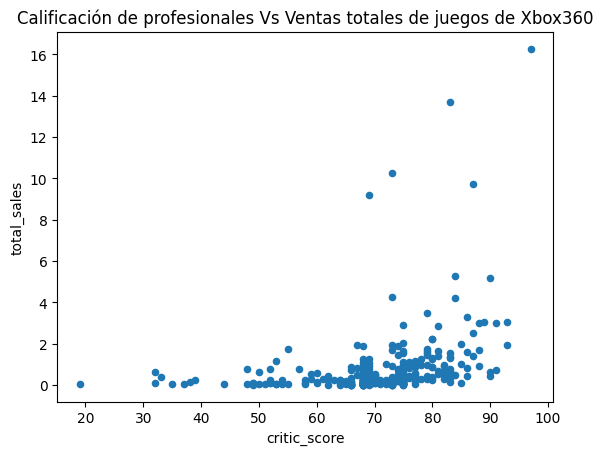

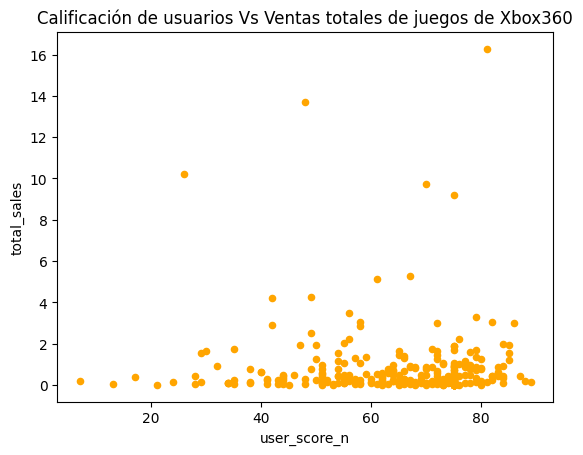

In [31]:
# creo un nuevo dataframe con las columnas que voy a necesitar
x_df = new_df[['platform','total_sales','critic_score','user_score']].copy()
# Reviso los datos
x_df.info()
# Modifico el tipo de dato a float
x_df['user_score']=x_df['user_score'].astype('float')
# Normalizo user_score
x_df['user_score_n']=x_df['user_score']*10

#Filtro el dataframe con la plataforma escogida Xbox360 y lo muestro:
x360_df =x_df[x_df['platform']=='x360']
print()
print(x360_df)
#Mustro los gráficos
print()
x360_df.plot(x='critic_score', y='total_sales', kind= 'scatter')
plt.title('Calificación de profesionales Vs Ventas totales de juegos de Xbox360')
plt.show()

print()
x360_df.plot(x='user_score_n', y='total_sales', kind= 'scatter', color= 'orange')
plt.title('Calificación de usuarios Vs Ventas totales de juegos de Xbox360')
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

**8. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.**

In [32]:
# Para realizar el gráfico primero necesito agrupar los datos que voy a usar que serían las ventas totales, el critic_score y el user_score

sales_and_score = new_df[['total_sales','critic_score', 'user_score']].copy()
print(sales_and_score)
sales_and_score.info()
print()

      total_sales  critic_score user_score
0           21.05          97.0        8.2
1           16.27          97.0        8.1
2           14.63          73.0        7.5
3           14.60          74.0        7.5
4           13.79          83.0        5.3
...           ...           ...        ...
2881         0.01          66.0        7.5
2882         0.01          69.0        7.5
2883         0.01          68.0        7.5
2884         0.01          66.0        7.5
2885         0.01          70.0        7.5

[2886 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_sales   2886 non-null   float64
 1   critic_score  2886 non-null   float64
 2   user_score    2886 non-null   object 
dtypes: float64(2), object(1)
memory usage: 67.8+ KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_sales   2886 non-null   float64
 1   critic_score  2886 non-null   float64
 2   user_score    2886 non-null   float64
dtypes: float64(3)
memory usage: 67.8 KB
      total_sales  critic_score  user_score  user_score_norm
0           21.05          97.0         8.2             82.0
1           16.27          97.0         8.1             81.0
2           14.63          73.0         7.5             75.0
3           14.60          74.0         7.5             75.0
4           13.79          83.0         5.3             53.0
...           ...           ...         ...              ...
2881         0.01          66.0         7.5             75.0
2882         0.01          69.0         7.5             75.0
2883         0.01          68.0         7.5             75.0
2884         0.01          

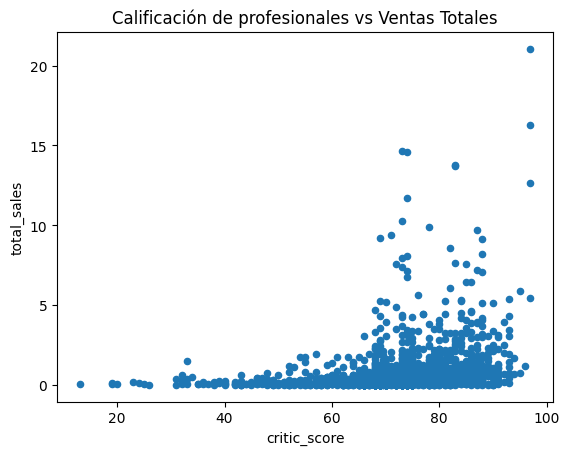

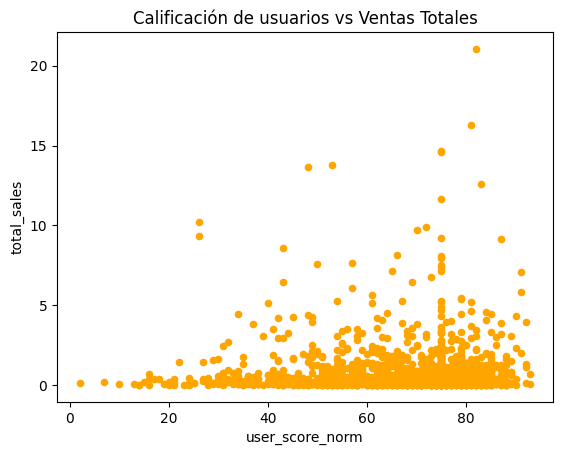

In [33]:
# Ya que la columna user_score tenía un tipo de dato Object, para poder normalizar las calificaciones
# he decidio cambiarla a float primero y luego sí multiplicar por 10

sales_and_score['user_score']=sales_and_score['user_score'].astype('float')
print()
sales_and_score.info()

# Normalización de los datosv(creando columna nueva)
sales_and_score['user_score_norm']=sales_and_score['user_score']*10
print(sales_and_score)

#Visualización de los datos
sales_and_score.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Calificación de profesionales vs Ventas Totales')
plt.show()

sales_and_score.plot(x='user_score_norm', y='total_sales', kind='scatter', color= 'orange')
plt.title('Calificación de usuarios vs Ventas Totales')
plt.show()

# CONCLUSIONES GRÁFICOS DE DISPERSIÓN PUNTO 7 Y 8 DEL PASO 3:

Tras analizar los gráficos de dispersión, es valido afirmar que muestran un comportamiento similar en donde **no hay una fuerte correlación entre la calificación de los usuarios o la calificación de los profesionales con las ventas totales de los video juegos**, esto se ve en ambos gráficos ya que **hay una agrupación de los puntos** en la parte inferior del mismo, es decir en la **zona donde hay menos ventas de los video juegos**, **independientemente de que estén bien calificados, más del 90% de los puntos no superan los 5 Millones en ventas.**

Sin embargo, también se puede decir que hay un pequeño porcentaje de los datos que muestra casos excepcionales (o aislados) en los que hay video juegos que superaron los 20 millones de ventas y que también estaban calificados con valores muy cercanos al 100.

esto quiere decir que quizá haga falta llevar un mejor registro de los datos y de la calificación de los mismos porque hay casos aislados en donde la puntuación no es buena o alta pero si superan por mucho en las ventas de otros juegos que están mejor calificados, esto puede deberse a que la gran mayoría de los usuarios no deja una reseña o que haga falta emplear un método distinto de calificación.

Finalmente, **al revisar exclusivamente la plataforma Xbox360** se puede ver que tiene el mismo comportamiento descrito anteriormente para el resto del dataframe, en donde la calificación de los usuarios y de los profesionales no parece influir en las ventas globales de la plataforma, ya que hay juegos con buenas calificaciones pero que tienen muy poco exito en las ventas, pero también se muestran algunos casos de exito en donde tanto la calificación como las ventas son muy altas.

# Desarrollo Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [34]:
#new_df.info()

# Creo un nuevo dataframe con las columnas de las ventas por región y los generos.
sales_by_region = new_df[['genre','na_sales','eu_sales','jp_sales', 'rating']].copy()
print(sales_by_region)

# Agrupo por genero cada una de las regiones y sumo las ventas por región en cada caso.
print()
na_sales_by_genre = sales_by_region.groupby('genre')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending= False)
print(na_sales_by_genre.head())

print()
eu_sales_by_genre = sales_by_region.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending= False)
print(eu_sales_by_genre.head())

print()
jp_sales_by_genre = sales_by_region.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending= False)
print(jp_sales_by_genre.head())

             genre  na_sales  eu_sales  jp_sales   rating
0           action      7.02      9.09      0.98        M
1           action      9.66      5.14      0.06        M
2          shooter      6.03      5.86      0.36  Unknown
3     role-playing      5.28      4.19      4.35  Unknown
4          shooter      4.99      5.73      0.65        M
...            ...       ...       ...       ...      ...
2881     adventure      0.00      0.00      0.01  Unknown
2882          misc      0.00      0.00      0.01  Unknown
2883        action      0.00      0.00      0.01  Unknown
2884     adventure      0.00      0.00      0.01  Unknown
2885    simulation      0.00      0.00      0.01  Unknown

[2886 rows x 5 columns]

           genre  na_sales
0         action    177.84
8        shooter    144.77
10        sports     81.53
7   role-playing     64.00
3           misc     38.19

           genre  eu_sales
0         action    159.34
8        shooter    113.47
10        sports     69.09
7   rol

**Observaciones de los datos**

Hasta el momento, los datos nos muestran un comportamiento muy similar entre los usuarios de Europa y Norte América, ya que el orden de los principales 5 generos es practicamente el mismo, a excepción del No. 5.
En primer lugar están los juegos con el genero de acción, luego Shooter, Sports, Role-playing, y por ultimo misc y racing para Norte America y Europa respectivamente.

Por otro lado, en el caso de Japón, los intereses de los usuarios suelen ser ligeramente distintos, cambiando la prioridad del estilo de juegos que prefieren, aquí, en primer lugar encontramos los juegos de rol, seguido de los juegos de acción, misc, simulation y por último fighthing.

lo más probable es que esto se deba a diferencias culturales en el consumo de videojuegos, ya que Este patrón resalta un enfoque más fuerte hacia los juegos narrativos y estratégicos, como RPGs y simuladores.

In [35]:
# Agrupo por rating y sumo las ventas por región en cada caso.
na_rating_df = sales_by_region.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False)
eu_rating_df = sales_by_region.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False)
jp_rating_df = sales_by_region.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False)

print(na_rating_df)
print()
print(eu_rating_df)
print()
print(jp_rating_df)

    rating  na_sales
2        M    231.57
0        E    114.37
4  Unknown    103.31
1     E10+     75.70
3        T     66.02

    rating  eu_sales
2        M    193.96
0        E    113.03
4  Unknown     91.50
1     E10+     55.37
3        T     52.96

    rating  jp_sales
4  Unknown    108.84
0        E     28.33
3        T     26.02
2        M     21.20
1     E10+      8.19


    rating  na_sales  eu_sales  jp_sales
0        M    231.57    193.96     21.20
1        E    114.37    113.03     28.33
2  Unknown    103.31     91.50    108.84
3     E10+     75.70     55.37      8.19
4        T     66.02     52.96     26.02


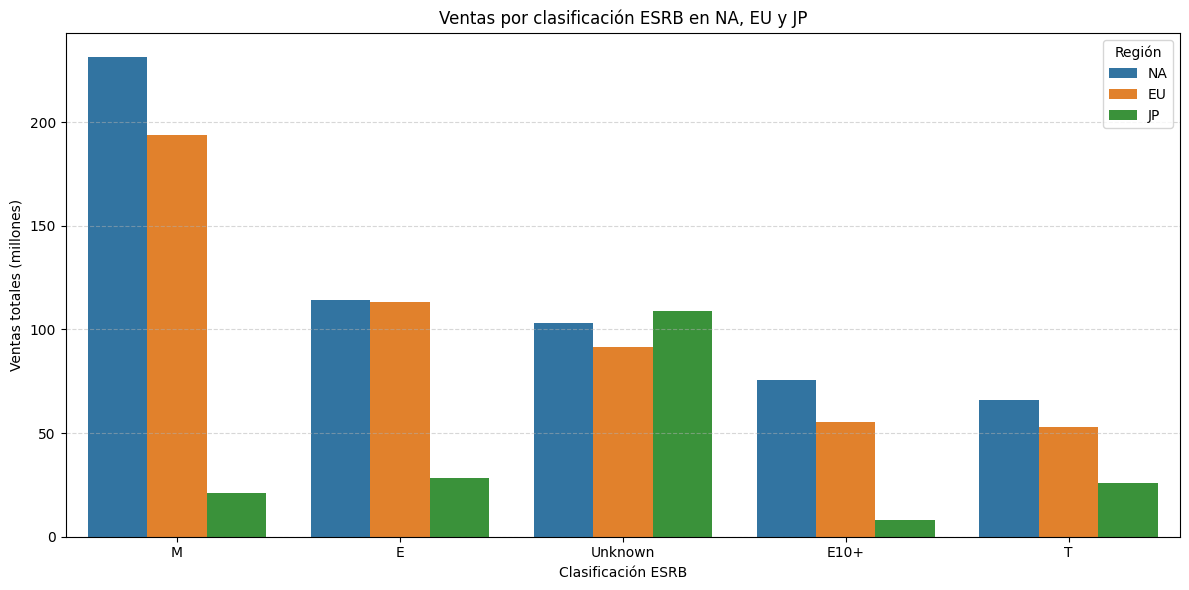

In [36]:
# Combino los dataframes filtrados  para fraficar los 3 en una sola gráfica de barras.
rating_merged = na_rating_df.merge(eu_rating_df, on='rating', how='outer')
rating_merged = rating_merged.merge(jp_rating_df, on='rating', how='outer')

rating_merged.columns = ['rating', 'na_sales', 'eu_sales', 'jp_sales']

print(rating_merged)

# Para transformar un Dataframe de formato ancho a formato largo puedo usar .melt() y poder realizar un gráfico de barras agrupadas para cada región.
rating_melted = pd.melt(
    rating_merged,
    id_vars='rating',
    value_vars=['na_sales', 'eu_sales', 'jp_sales'],
    var_name='region',
    value_name='sales'
)

# Limpiar nombres de región 
rating_melted['region'] = rating_melted['region'].str.replace('_sales', '').str.upper()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=rating_melted,
    x='rating',
    y= 'sales',
    hue='region',
)

plt.title('Ventas por clasificación ESRB en NA, EU y JP')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

**Observaciones de los datos**

El gráfico de barras por clasificación ESRB (rating) nos muestra que las principales ventas se dan en las categorías M (Mature) y E (Everyone) sobre todo para las regiones como Norte América y Europa, Esto indica que los juegos orientados tanto a audiencias adultas como generales tienen una fuerte presencia comercial en estos mercados.

Por otra parte, en el caso de japón sus principales ventas se dan en la categoría que previamente se habia modificado, ya que al realizar el pretratamiendo de los datos habian muchos juegos cuyo rating era un valor nulo, es decir, que aparecian como valor ausente NaN y fue cambiada a 'Unknown' para no perder gran parte de estos datos del dataframe al momento de eliminar datos ausentes.

y finalmente las ultimas dos categorías con mayores ventas fueron E10+ (Everyone 10 and older) y T (Teen) aparecen como las siguientes con mayor volumen de ventas a nivel global, aunque con una participación algo menor respecto a las categorías líderes.

# Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.



**Hipótesis 1**

In [37]:
# Filtro valores válidos usando query y convierto los datos de user_score a float
xone_scores = new_df.query("platform == 'xone' and user_score != 'tbd'")['user_score'].astype(float)
pc_scores = new_df.query("platform == 'pc' and user_score != 'tbd'")['user_score'].astype(float)

# Realizo la prueba de hipótesis
alpha = 0.05
results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('p:', results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: las medias son significativamente diferentes")
else:
    print("No se puede rechazar la hipótesis nula: las medias son similares")


p: 0.20480155503400313
No se puede rechazar la hipótesis nula: las medias son similares


In [38]:
# revisnado los valores antes de proceder con el análisis porque un valor p: NaN es inusual.

print("Xbox One - cantidad de datos:", len(xone_scores))
print("PC - cantidad de datos:", len(pc_scores))
print("Xbox One - contiene NaN?", xone_scores.isna().sum())
print("PC - contiene NaN?", pc_scores.isna().sum())
print("Media XOne:", xone_scores.mean())
print("Media PC:", pc_scores.mean())

Xbox One - cantidad de datos: 247
PC - cantidad de datos: 250
Xbox One - contiene NaN? 0
PC - contiene NaN? 0
Media XOne: 6.778947368421053
Media PC: 6.6171999999999995


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Conclusión Hipótesis 1: Comparación de calificaciones entre Xbox One y PC

Se realizó una prueba de hipótesis para comparar las **medias de puntuaciones de usuario ('user_score')** entre las plataformas **Xbox One** y **PC**, utilizando datos del periodo comprendido entre 2012 y 2016.  
Tras aplicar los filtros correspondientes, se obtuvieron:

- **247 registros para Xbox One**
- **250 registros para PC**
- Todos con datos válidos y sin valores nulos

**Media Xbox One:** 6.78  
**Media PC:** 6.62  
**p:** 0.2048

Dado que el valor p es mayor que el nivel de significancia (α = 0.05), **no se puede rechazar la hipótesis nula**. Esto indica que **no existe una diferencia estadísticamente significativa** entre las calificaciones promedio de usuarios para ambas plataformas.

**Interpretación final:**
Aunque las medias presentan una diferencia mínima (son similares), esta podría deberse al azar y no refleja una variación estructural entre ambas plataformas. Por lo tanto, se concluye que **los usuarios valoran los juegos de Xbox One y PC de manera similar** dentro del periodo analizado.

**Hipótesis 2**

In [41]:
# Filtro valores válidos usando query y convierto los datos de user_score a float
action_scores = new_df.query("genre == 'action' and user_score != 'tbd'")['user_score'].astype(float)
sports_scores = new_df.query("genre == 'sports' and user_score != 'tbd'")['user_score'].astype(float)

# Realizo la prueba de hipótesis
results2 = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('p-valor:', results2.pvalue)

if results2.pvalue < alpha: #alpha = 0.05
    print("Se rechaza la hipótesis nula: las medias son significativamente diferentes")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa")


p-valor: 1.1016280097403209e-21
Se rechaza la hipótesis nula: las medias son significativamente diferentes


In [42]:
# revisndo los valores antes de proceder con el análisis porque un valor p: NaN es inusual.

print("Action - cantidad de datos:", len(action_scores))
print("Sports - cantidad de datos:", len(sports_scores))
print("Action - contiene NaN?", action_scores.isna().sum())
print("Sports - contiene NaN?", sports_scores.isna().sum())
print("Media Action:", action_scores.mean())
print("Media Sports:", sports_scores.mean())

Action - cantidad de datos: 1031
Sports - cantidad de datos: 268
Action - contiene NaN? 0
Sports - contiene NaN? 0
Media Action: 7.157613967022308
Media Sports: 6.012686567164179


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Para ambas pruebas verifica que con los textos con los que filtramos las bases son los que tenemos en nuestra base de datos. Para esto idenfica si tenemos elementos en cada una de nuestras bases filtradas

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

Gracias por tus comentarios, está corregido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutanndo los siguientes cursos!

## Conclusión Hipótesis 2: Comparación de calificaciones entre géneros Action y Sports

En esta prueba de hipótesis se buscó determinar si existen diferencias significativas entre las **calificaciones promedio de usuario ('user_score')** en los géneros **Action** y **Sports**, durante el periodo comprendido entre 2012 y 2016.

Tras aplicar los filtros correctamente, se obtuvieron:

- **1031 registros para Action**
- **268 registros para Sports**
- Todos los valores eran válidos y no se detectaron datos nulos

**Media Action:** 7.16  
**Media Sports:** 6.01  
**p:** 1.1016e-21

Dado que p es **extremadamente inferior** en comparación al nivel de significancia establecido (α = 0.05), **se rechaza la hipótesis nula**. Esto indica que **sí existe una diferencia estadísticamente significativa** entre las puntuaciones medias otorgadas por los usuarios a los géneros analizados.

**Interpretación final:**
Los usuarios tienden a calificar los juegos de género **Action** con valores notablemente superiores a los de **Sports**. Esto podría deberse a diferencias en mecánicas de juego, profundidad narrativa, variedad de títulos o simplemente a una mayor afinidad del público por el género de acción.

# Paso 6. Escribe una conclusión general

Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.

## Conclusión general del análisis

A partir del análisis exploratorio de los datos históricos de ventas de videojuegos, se identificaron varias tendencias clave que pueden ayudar a la compañía a tomar decisiones más informadas para futuras campañas:

- **Plataformas con mayor potencial para 2017:** Las plataformas líderes en ventas globales recientes son PlayStation 4, Xbox One y Nintendo 3DS. Estas mostraron buen rendimiento y deberían ser el foco principal para el próximo año.

- **Géneros más rentables:** Acción, Shooter y Deportes son consistentemente los más vendidos en regiones como NA y Europa, mientras que en Japón destaca fuertemente el género RPG. Esto sugiere adaptar el catálogo regionalmente.

- **La calificación no garantiza éxito comercial:** La correlación entre la puntuación de críticos/usuarios y las ventas es débil. Algunos títulos con calificaciones bajas vendieron millones, y viceversa. Factores como marketing, franquicia o timing tienen un rol más fuerte en las ventas.

- **Impacto de la clasificación ESRB:** En NA y EU dominan los juegos con clasificación 'M' y 'E'. En Japón predominan los juegos sin clasificación o marcados como 'Unknown', lo cual podría deberse a lanzamientos sin ESRB o datos ausentes.

- **Diferencias culturales por región:** Japón muestra claras preferencias distintas respecto a género y plataformas, lo que refuerza la necesidad de estrategias de mercado localizadas.

- **Pruebas de hipótesis:** Se analizaron dos comparaciones: calificaciones entre plataformas (Xbox One vs PC) y entre géneros (Action vs Sports).
  La primera prueba mostró **medias similares** entre plataformas (p = 0.2048), sin diferencias significativas.  
  La segunda reveló una **diferencia significativa** entre géneros (p ≈ 1e-21), siendo Action valorado más alto por los usuarios.

**Recomendación general:** Para planear una campaña efectiva en 2017, se sugiere centrar esfuerzos en PS4, XOne y 3DS, con enfoque en géneros más exitosos regionalmente, sin depender excesivamente de las reseñas. Además, sería útil mejorar la calidad del registro de datos (especialmente `user_score`) para futuros análisis.

